In [4]:
import numpy as np

In [5]:
import re
lemma = lambda x: re.sub("\d", "", x)

In [14]:
inputs = {'stone': 'X', 'coal': 'X',  'iron': 'X', "gold": 'X', 'redstone': 'X', 'lapis': 'X','diamond': 'X', 'emerald': 'X'}
cardinalities = {'X': 1, 'T': 4, 'I': 2}
n = sum(cardinalities[i] for i in inputs.values())
print("n = ", n)
transition = np.zeros((n,n,4))
T = transition
aux = 0 
name2num = {}
for i in inputs.keys():
    for a in range(cardinalities[inputs[i]]):
        name2num[(i+str(a)) if a != 0 else i] = aux
        aux += 1
    
constrictions = [('stone', 'stone'), ('stone', 'coal'), ('stone', "gold"), ('stone', "iron"), ('stone', "diamond"), 
                 ('stone', "emerald"), ('stone', 'lapis'), ('lapis', 'lapis'), ('stone', "redstone"), ('coal', 'coal'), ('gold', 'gold'), ('iron', 'iron'), 
                ("diamond", "diamond"), ("redstone", "redstone")]
    
counter = 0
Map = {}

for tile in inputs.keys():
    print(tile)
    sym = inputs[tile]
    if sym == 'X':
        a = lambda i: i 
        b = lambda i: i
    elif sym == 'I':
        a = lambda i: 1-i
        b = lambda i: i
    elif sym == 'T': 
        a = lambda i: (i+1)%4
        b = lambda i: i if i%2 == 0 else 4-i
        
      
    Map[tile] = np.zeros((cardinalities[sym], 8), int)
    for t in range(cardinalities[sym]):    
        Map[tile][t,0] = t;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
        Map[tile][t,1] = a(t);
        Map[tile][t,2] = a(a(t));
        Map[tile][t,3] = a(a(a(t)));
        Map[tile][t,4] = b(t);
        Map[tile][t,5] = b(a(t));
        Map[tile][t,6] = b(a(a(t)));
        Map[tile][t,7] = b(a(a(a(t))));
        
        for s in range(8): 
            Map[tile][t,s] += counter;
    
    #print(Map)
    
    counter += cardinalities[sym]
    
for pair in constrictions:
    tileL = lemma(pair[0])
    tileR = lemma(pair[1])
    tL = name2num[pair[0]] - name2num[tileL]
    tR = name2num[pair[1]] - name2num[tileR]
    
    for s in range(2):
        for r in range(4):
            direction=1+r
            T[Map[tileL][tL,4*s+r], Map[tileR][tR,4*s+r], direction%4 if s == 0 else (-direction)%4] = 1
    

for i in range(n):
    for j in range(n):
        for k in range(4):
            if T[i,j,k] == 1: 
                T[j,i,(k+2)%4] = 1

n =  8
stone
coal
iron
gold
redstone
lapis
diamond
emerald


In [50]:
dox = 50 #Output dimensionx
doy = 50 #Output dimensiony

In [51]:
def select_minimum_entropy(M):
    x_min, y_min = 0,0 
    nmin = 10
    for i in range(dox):
        for j in range(doy):
            if not assigned[i,j]:
                aux = np.count_nonzero(M[i,j]) + np.random.normal(loc = 0.0, scale = 0.1)
                if aux < nmin:
                    x_min = i
                    y_min = j
                    nmin = aux
    return x_min, y_min

In [52]:
M = np.ones((dox, doy, n))
M[:,:,0] *= 50 #Stone
M[:,:,1] *= 5 #Coal
M[:,:,2] *= 2 #Iron
M[:,:,3] *= 1 #Gold
M[:,:,4] *= 1 #Restone
M[:,:,5] *= 1 #Lapis
M[:,:,6] *= 0.5 #Diamond
M[:,:,7] *= 0.1 #Emerald

assigned = np.zeros((dox,doy))

In [53]:
def neighbours(x,y, dox, doy):
    """
    North = 0  
    West = 3
    South = 2
    East = 1
    """                                            
    l = []
    
    if y > 0:
        l.append((x, y-1, 0))
    if x > 0:
        l.append((x-1, y, 3))
    
    if y < doy-1:
        l.append((x, y+1, 2))
    
    if x < dox-1: 
        l.append((x+1, y, 1))
    
    return l

In [54]:
order = []
bigM = []
M_initial = M.copy()
while np.mean(assigned) != 1:
    x,y = select_minimum_entropy(M)
    print(x,y, np.mean(assigned))
    new_state = np.random.choice(n, p = M[x,y]/np.sum(M[x,y]))
    M[x,y] = np.zeros(n) #Collapse
    
    M[x,y,new_state] = 1
    assigned[x,y] = 1
    order.append([x,y])
    bigM.append(M.copy())
    #Propagation
    for tupl in neighbours(x,y, dox, doy):
        xn, yn, direction = tupl
        M[xn,yn, new_state] += 10
        for state in range(n):
            if transition[new_state, state, direction] == 0:
                M[xn,yn,state] = 0
        if np.mean(M[xn,yn]) == 0:
            M = M_initial.copy()
            assigned = np.zeros((dox,doy))
            order = []
            bigM = []
            break

39 7 0.0
32 14 0.0004
41 14 0.0008
40 14 0.0012
41 15 0.0016
41 13 0.002
42 14 0.0024
46 19 0.0028
9 25 0.0032
36 0 0.0036
40 9 0.004
40 34 0.0044
20 1 0.0048
24 38 0.0052
36 30 0.0056
7 17 0.006
21 18 0.0064
48 14 0.0068
25 16 0.0072
46 32 0.0076
23 5 0.008
32 32 0.0084
37 31 0.0088
28 47 0.0092
11 21 0.0096
12 21 0.01
11 20 0.0104
11 22 0.0108
12 22 0.0112
10 21 0.0116
12 20 0.012
13 21 0.0124
13 20 0.0128
12 19 0.0132
37 7 0.0136
2 27 0.014
2 28 0.0144
1 27 0.0148
2 26 0.0152
3 27 0.0156
1 8 0.016
34 22 0.0164
16 33 0.0168
13 13 0.0172
12 13 0.0176
13 14 0.018
13 12 0.0184
14 13 0.0188
14 12 0.0192
14 14 0.0196
15 13 0.02
23 33 0.0204
13 5 0.0208
13 4 0.0212
13 6 0.0216
14 4 0.022
12 5 0.0224
13 3 0.0228
12 3 0.0232
13 2 0.0236
12 4 0.024
14 6 0.0244
15 6 0.0248
14 3 0.0252
13 7 0.0256
14 5 0.026
14 7 0.0264
12 6 0.0268
23 13 0.0272
42 17 0.0276
39 44 0.028
20 42 0.0284
43 45 0.0288
29 36 0.0292
39 26 0.0296
27 34 0.03
27 33 0.0304
26 34 0.0308
28 34 0.0312
27 35 0.0316
18 11 0.032


7 22 0.2676
9 22 0.268
8 23 0.2684
3 33 0.2688
3 30 0.2692
16 32 0.2696
32 6 0.27
24 28 0.2704
28 20 0.2708
19 38 0.2712
9 27 0.2716
5 9 0.272
23 34 0.2724
14 25 0.2728
22 19 0.2732
27 20 0.2736
27 21 0.274
27 19 0.2744
26 20 0.2748
30 28 0.2752
31 28 0.2756
30 27 0.276
30 29 0.2764
23 12 0.2768
25 31 0.2772
19 6 0.2776
20 6 0.278
18 6 0.2784
19 5 0.2788
19 7 0.2792
9 37 0.2796
8 15 0.28
22 11 0.2804
21 11 0.2808
23 11 0.2812
22 10 0.2816
22 12 0.282
36 33 0.2824
46 41 0.2828
22 37 0.2832
16 28 0.2836
9 15 0.284
7 41 0.2844
19 11 0.2848
4 23 0.2852
34 35 0.2856
46 8 0.286
46 9 0.2864
47 8 0.2868
45 8 0.2872
30 0 0.2876
1 13 0.288
44 5 0.2884
23 47 0.2888
41 47 0.2892
6 11 0.2896
47 35 0.29
31 19 0.2904
29 16 0.2908
28 16 0.2912
39 40 0.2916
36 25 0.292
9 24 0.2924
31 29 0.2928
36 12 0.2932
25 1 0.2936
39 38 0.294
19 42 0.2944
45 46 0.2948
45 47 0.2952
45 45 0.2956
46 46 0.296
46 47 0.2964
47 46 0.2968
47 47 0.2972
46 48 0.2976
46 45 0.298
46 14 0.2984
37 39 0.2988
49 10 0.2992
32 41 0.

9 0 0.5408
32 13 0.5412
3 49 0.5416
0 4 0.542
18 42 0.5424
8 35 0.5428
1 40 0.5432
4 18 0.5436
12 43 0.544
12 44 0.5444
20 46 0.5448
16 7 0.5452
13 36 0.5456
13 35 0.546
14 36 0.5464
13 37 0.5468
26 44 0.5472
31 23 0.5476
13 29 0.548
22 42 0.5484
3 22 0.5488
3 23 0.5492
2 22 0.5496
3 21 0.55
4 22 0.5504
4 21 0.5508
43 7 0.5512
20 20 0.5516
9 31 0.552
12 0 0.5524
34 4 0.5528
34 11 0.5532
43 8 0.5536
37 23 0.554
29 38 0.5544
25 17 0.5548
14 23 0.5552
15 23 0.5556
15 24 0.556
13 23 0.5564
14 24 0.5568
12 23 0.5572
14 22 0.5576
11 23 0.558
13 22 0.5584
2 5 0.5588
1 5 0.5592
2 4 0.5596
0 5 0.56
3 5 0.5604
1 4 0.5608
1 6 0.5612
29 9 0.5616
29 31 0.562
33 21 0.5624
24 6 0.5628
25 3 0.5632
12 7 0.5636
15 12 0.564
24 8 0.5644
42 8 0.5648
38 22 0.5652
38 23 0.5656
37 22 0.566
36 22 0.5664
10 10 0.5668
29 34 0.5672
9 21 0.5676
39 6 0.568
44 27 0.5684
0 35 0.5688
1 35 0.5692
0 34 0.5696
32 49 0.57
33 34 0.5704
10 40 0.5708
22 18 0.5712
30 30 0.5716
21 41 0.572
35 13 0.5724
45 16 0.5728
0 27 0.5732

18 26 0.8068
43 48 0.8072
5 33 0.8076
16 29 0.808
35 42 0.8084
20 4 0.8088
20 17 0.8092
30 1 0.8096
39 32 0.81
43 23 0.8104
24 3 0.8108
29 15 0.8112
28 19 0.8116
26 12 0.812
33 35 0.8124
43 44 0.8128
15 38 0.8132
9 43 0.8136
16 40 0.814
18 1 0.8144
18 0 0.8148
27 6 0.8152
21 5 0.8156
4 6 0.816
21 10 0.8164
34 30 0.8168
29 39 0.8172
29 14 0.8176
39 8 0.818
40 8 0.8184
18 31 0.8188
41 21 0.8192
40 10 0.8196
9 35 0.82
5 19 0.8204
49 2 0.8208
40 5 0.8212
32 4 0.8216
46 20 0.822
45 20 0.8224
5 29 0.8228
43 35 0.8232
23 48 0.8236
5 37 0.824
21 31 0.8244
37 38 0.8248
7 34 0.8252
36 2 0.8256
9 29 0.826
28 43 0.8264
11 44 0.8268
44 28 0.8272
0 31 0.8276
1 31 0.828
24 26 0.8284
23 26 0.8288
48 3 0.8292
49 3 0.8296
43 17 0.83
34 39 0.8304
9 17 0.8308
49 13 0.8312
42 23 0.8316
10 43 0.832
27 28 0.8324
34 27 0.8328
35 12 0.8332
0 14 0.8336
21 8 0.834
25 14 0.8344
47 5 0.8348
15 41 0.8352
10 2 0.8356
2 13 0.836
40 42 0.8364
3 29 0.8368
34 1 0.8372
24 18 0.8376
25 18 0.838
8 45 0.8384
12 9 0.8388
41 

In [55]:
MM = np.argmax(M, axis = 2)

In [56]:
# num2name = {a:b for b,a in name2num.items()}

# for i in range(len(MM)):
#     for j in range(len(MM[0])):
#         s = num2name[MM[i,j]]
#         print(s[0], end = "|" if j < len(MM[0])-1 else "\n")
#     print("-"*120)

In [58]:
from PIL import Image
import numpy as np
tiles = {}
tiles[0] = Image.open("ore_textures/Stone.png")
tiles[1] = Image.open("ore_textures/Coal_ore.png")
tiles[2] = Image.open("ore_textures/Iron_ore.png")
tiles[3] = Image.open("ore_textures/gold_ore.png")
tiles[4] = Image.open("ore_textures/Redstone_ore.png")
tiles[5] = Image.open("ore_textures/Lapis_ore.png")
tiles[6] = Image.open("ore_textures/Diamond_ore.png")
tiles[7] = Image.open("ore_textures/Emerald_ore.png")

In [59]:
def collapsed2img(M, tiles):
    h_grid, w_grid = M.shape
    h, w = tiles[0].size
    mapa = Image.new("RGB", (h_grid*h,w_grid*w))
    for i in range(h_grid):
        for j in range(w_grid):
            tile_pos = (h*i,w*j) #left top corner of pasted tile
            mapa.paste(tiles[M[i,j]], tile_pos)
    return mapa

In [60]:
solucio = collapsed2img(MM,tiles)

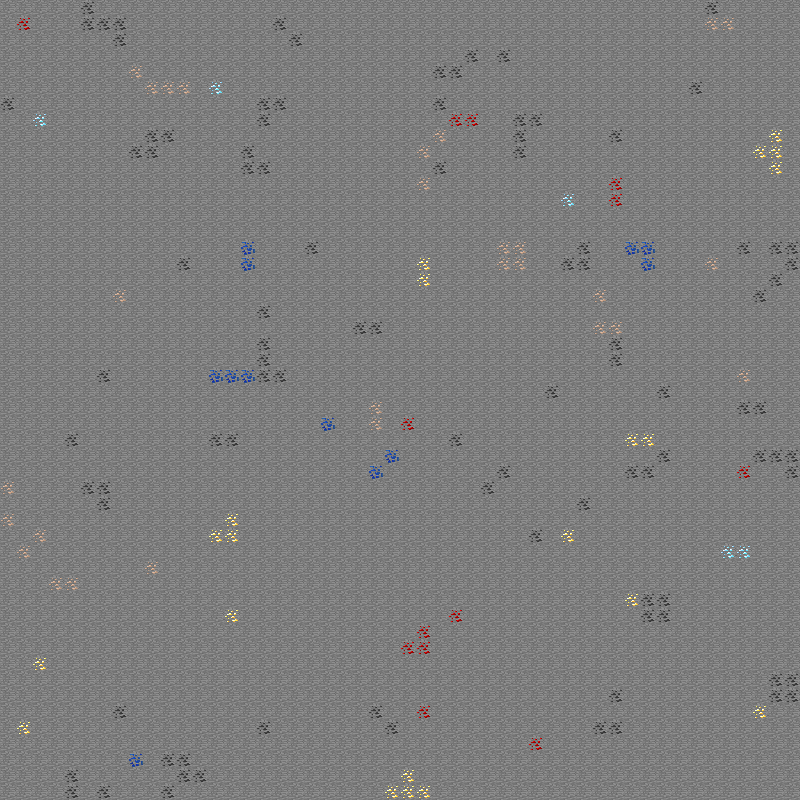

In [61]:
solucio

In [62]:
grey_patch = Image.new("RGB", (85,85), 'grey')

In [96]:
tiles[8] = grey_patch

In [93]:
def array_at_t(t):
    res = np.ones((50, 50), int)*8
    for i in range(t):
        res[order[i][0], order[i][1]] = MM[order[i][0], order[i][1]]
    return collapsed2img(res, tiles)

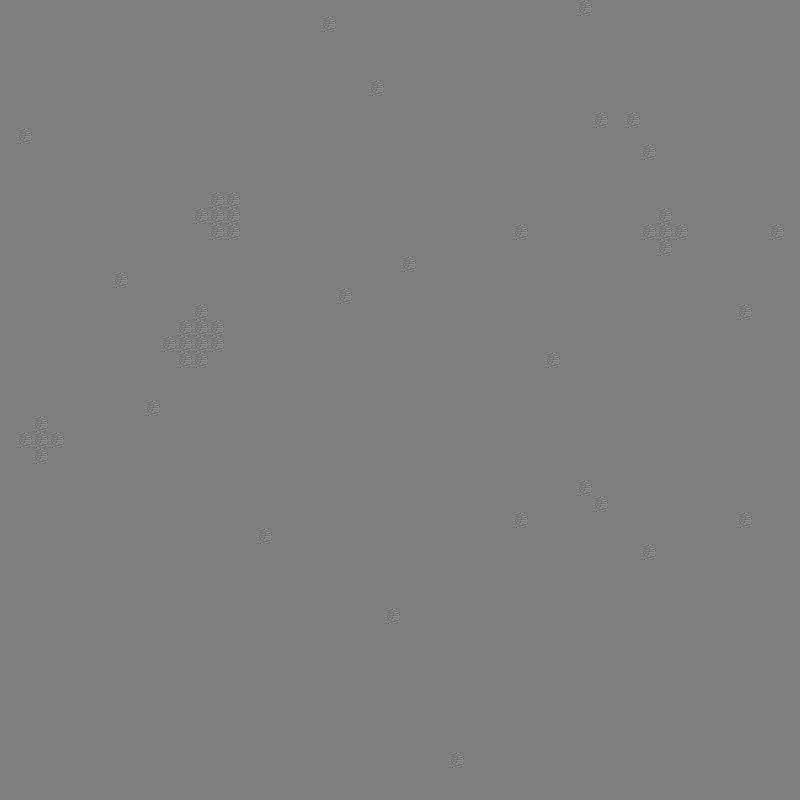

In [100]:
array_at_t(50)

In [101]:
v = []
for i in range(50*50+1):
    print(i)
    v.append(array_at_t(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


In [102]:
v[0].save("minecraft.gif", save_all = True, append_images = v[1:], duration = 20)

In [392]:
tiles[1].size

(20, 20)

In [398]:
len(bigM[0])

10

In [67]:
np.array(tiles[0], np.float).shape

(16, 16, 4)

In [78]:
def imatge(t):
    h_grid, w_grid = 10, 10
    h, w = tiles[0].size
    mapa = Image.new("RGB", (10*h,10*w))
    Mat = bigM[t]
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            idxs = np.where(Mat[i,j] != 0)[0]
            print(len(idxs), Mat.shape[-1])
            if len(idxs) < Mat.shape[-1]:
                arr=np.zeros((h,w,3),np.float)
                for k in idxs:
                    # Build up average pixel intensities, casting each image as an array of floats
                    imarr=np.array(tiles[k],dtype=np.float)[:,:,:3]
                    arr=arr+imarr/len(idxs)

                tile_pos = (h*i,w*j) #left top corner of pasted tile
                mapa.paste(Image.fromarray(arr.astype(np.uint8), mode = "RGB"), tile_pos)
            else:
                tile_pos = (h*i,w*j)
                mapa.paste(Image.new("RGB", (h,w), 'grey'), tile_pos)
    return mapa

In [88]:
np.where(bigM[1] != bigM[0])

(array([32, 32, 32, 32, 32, 32, 32, 32, 38, 39, 39, 40], dtype=int64),
 array([14, 14, 14, 14, 14, 14, 14, 14,  7,  6,  8,  7], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0], dtype=int64))

In [407]:
vv = []
for i in range(625):
    print(i)
    vv.append(imatge(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


IndexError: list index out of range

In [408]:
vv[0].save("smallblurredgrey.gif", save_all = True, append_images = vv[1:], duration = 50)

In [241]:
dic = {}
dic[0] = np.array([0,1,0,1,1,1,0,0,0]).reshape(3,3)
dic[1] = np.array([0,1,0,0,1,1,0,1,0]).reshape(3,3)
dic[2] = np.array([0,0,0,1,1,1,0,1,0]).reshape(3,3)
dic[3] = np.array([0,1,0,1,1,0,0,1,0]).reshape(3,3)

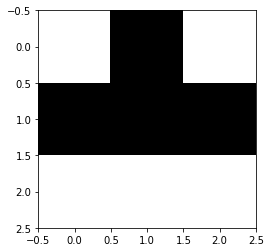

In [404]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(dic[0], cmap = 'Greys')

In [254]:
M[0,0]

array([0., 1., 0., 0.])

In [262]:
np.ix_([3*i,3*(i+1)],[3*j,3*(j+1)])

(array([[0],
        [3]]), array([[0, 3]]))

In [258]:
dic[MM[i,j]]

array([[0, 1, 0],
       [0, 1, 1],
       [0, 1, 0]])

In [294]:
res = np.zeros((30,30))
for i in range(10):
    for j in range(10):
        res[np.ix_(range(3*i,3*(i+1)),range(3*j,3*(j+1)))] = dic[MM[j,i]]

In [293]:
MM.T

array([[1, 0, 3, 1, 3, 1, 3, 1, 0, 0],
       [1, 2, 0, 0, 0, 3, 1, 0, 2, 2],
       [3, 1, 2, 2, 2, 0, 0, 2, 3, 1],
       [1, 3, 1, 3, 1, 2, 2, 3, 1, 3],
       [3, 1, 0, 0, 0, 0, 0, 3, 1, 0],
       [1, 0, 2, 2, 2, 2, 2, 0, 0, 2],
       [1, 2, 0, 3, 1, 0, 0, 2, 2, 0],
       [3, 1, 2, 3, 1, 2, 2, 3, 1, 2],
       [3, 1, 3, 1, 0, 3, 1, 0, 3, 1],
       [3, 1, 3, 1, 2, 3, 1, 2, 0, 3]], dtype=int64)

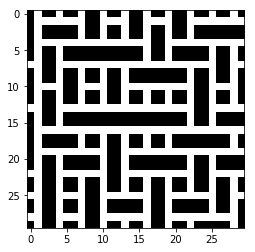

In [295]:
plt.imshow(res, 'gray')